# PW4 - Linear Regression

## Imports

In [429]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [430]:
datafile = "lausanne-appart.csv"

Read the data

In [431]:
dataset = pd.read_csv(datafile)

Display first rows

In [432]:
dataset.head()

living_area  nb_rooms  rent_price
0           69       3.0        1810
1           95       3.5        2945
2           21       1.5         685
3           20       1.0         720
4           33       1.5         830

## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

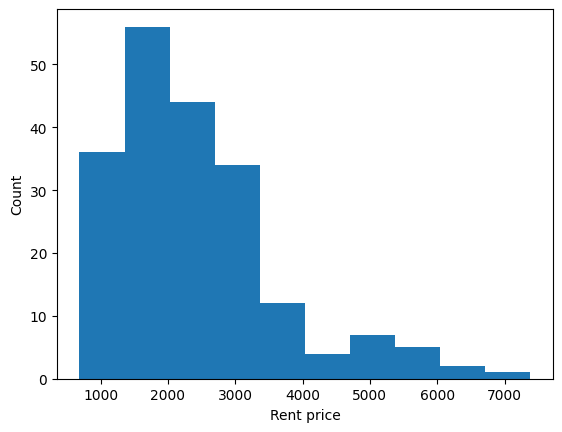

In [433]:
# Your code here

plt.hist(dataset["rent_price"])
plt.xlabel("Rent price")
plt.ylabel("Count")
plt.show()

b) Plot a histogram to visualize the distribution of the living area

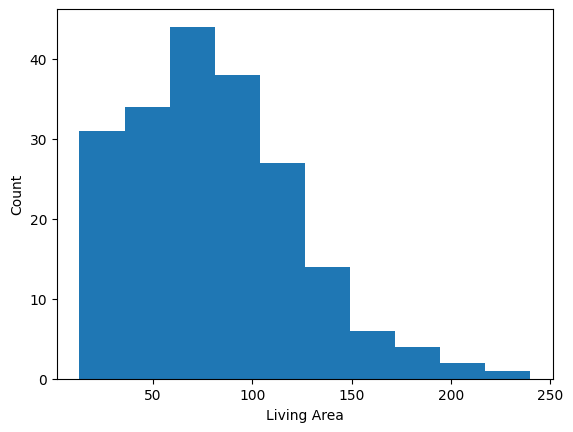

In [434]:
# Your code here

plt.hist(dataset["living_area"])
plt.xlabel("Living Area")
plt.ylabel("Count")
plt.show()

c) Plot a scatter plot of renting price as a function of living area

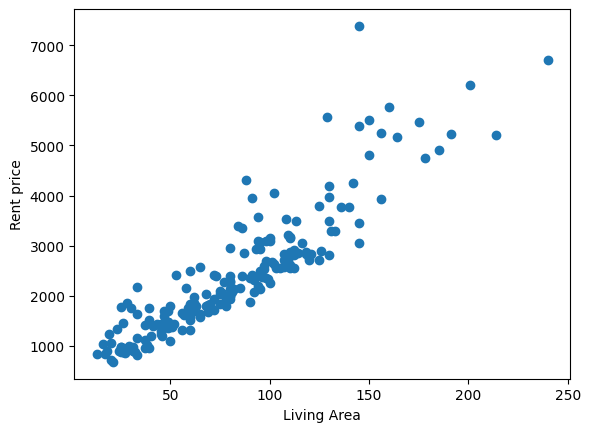

In [435]:
# Your code here

plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

plt.show()

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

Theta : [240.07710727  26.33242457]


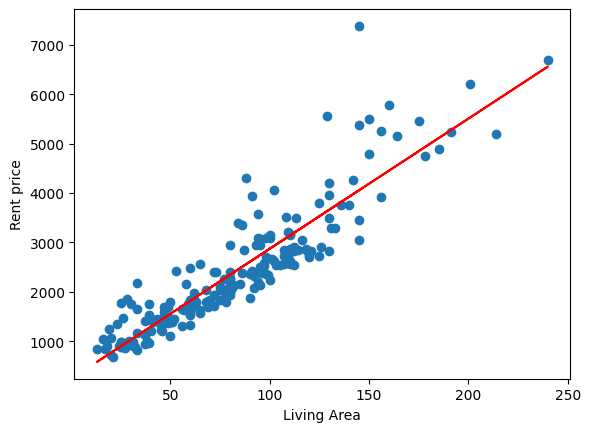

In [436]:
# Your code here
X = dataset["living_area"].to_frame()
X.insert(0, "x0", 1) # add the column full of ones at the start, this represents x0
X = np.array(X)

y = np.array(dataset["rent_price"])

theta = np.linalg.inv(X.T @ X) @ X.T @ y 

print(f"Theta : {theta}")


plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

y_regr = theta[0] + theta[1] * X[:,1]
plt.plot(X[:,1], y_regr, color='red', label='Regression line')

plt.show()

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [437]:
# Your code here
def cost_J(y_pred, y):
    return (1/(2*len(y))) * np.sum((y_pred - y)**2)

y_pred = X @ theta
# print(y_pred)
# print(X)
closed_form_cost = cost_J(y_pred, y)
print(f" Overall cost : {closed_form_cost}")

 Overall cost : 138034.95779787414


## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

Theta = [240.07710713  26.33242457]
Cost = 138034.95779787414


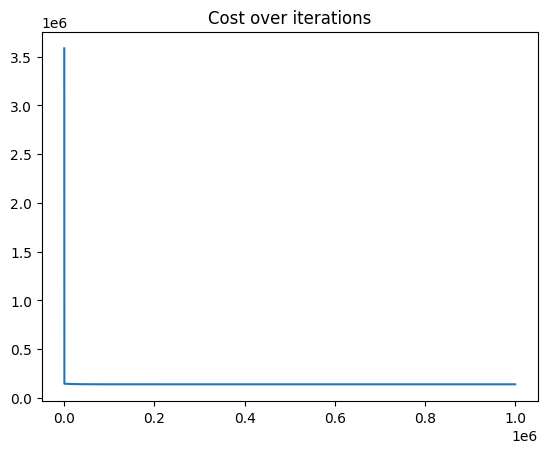

In [438]:
# Your code here

def gradient_descent(X, y, max_iter, alpha):
    theta = np.zeros((2))
    costs = []

    for i in range(0, max_iter): # we could also use a delta on the cost function with a while to stop when the cost is not improving but we wanted to see the curve after x iterations
        y_pred = X @ theta
        theta[0] = theta[0] - alpha * (1/len(y)) * np.sum(y_pred - y)
        theta[1] = theta[1] - alpha * (1/len(y)) * np.sum((y_pred - y) * X[:,1])  

        c = cost_J(y_pred, y) # to plot the costs over iters
        costs.append(c)

    y_pred = X @ theta
    print(f"Theta = {theta}")
    print(f"Cost = {cost_J(y_pred, y)}")

    plt.plot(range(0, len(costs)), costs)
    plt.title("Cost over iterations")
    plt.show()

gradient_descent(X, y, max_iter = 1000000, alpha = 0.0001) # i got the best results with those parameters

a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

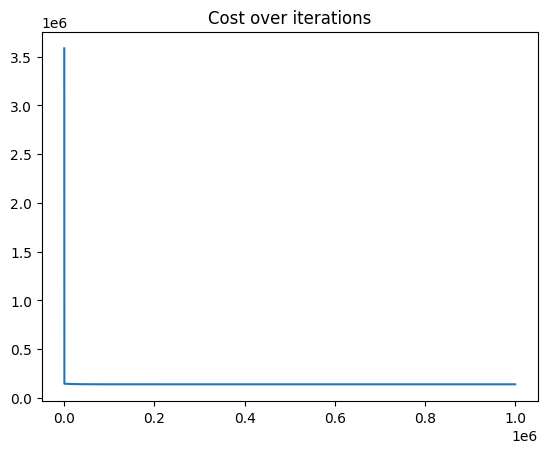

In [439]:
# Your code here
plt.plot(range(0, len(costs)), costs)
plt.title("Cost over iterations")
plt.show()

In this scenario, we can clearly observe a plateau of the cost function. This means that we have reached a local minimum while trying to minimise the cost.

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

The stopping criterion can be a small delta between each calculations of the cost. Like if the cost did not change of at least delta, this means we are in a plateau and should stop.

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

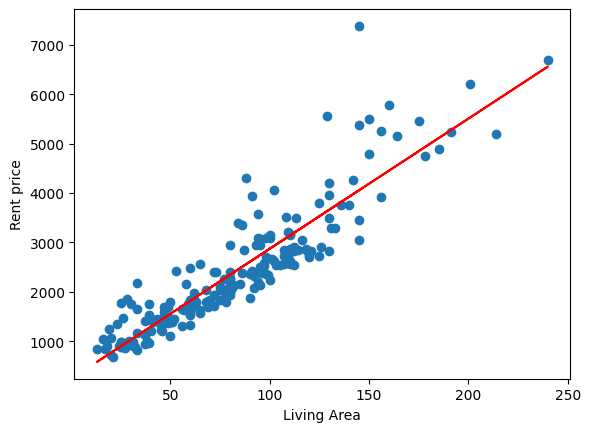

In [440]:
plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

y_regr = theta[0] + theta[1] * X[:,1]
plt.plot(X[:,1], y_regr, color='red', label='Regression line')

plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [441]:
# Your code here

print(f"The best cost value is {best_cost}, the exercice 2 cost value is {closed_form_cost}")

The best cost value is inf, the exercice 2 cost value is 138034.95779787414


We took some time to experiment with the alpha and max_iter values to try to get the best possible result. It seems that the closed form formula is the best one but we can get really close by tweaking those two values. 

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

Theta = [ 0.338377   28.68612806]
Cost = 144162.5602768206


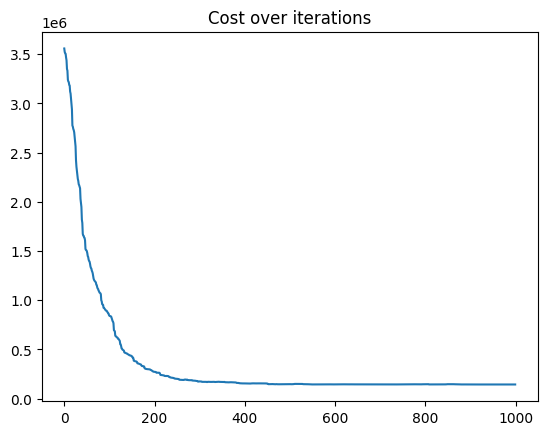

In [442]:
# Your code here
import random
def stochastic_gradient_descent(X, y, max_iter, alpha):
    
    theta = np.zeros((2))

    costs = []


    for i in range(0, max_iter): # we could also use a delta on the cost function with a while to stop when the cost is not improving but we wanted to see the curve after x iterations
        rand = int(random.random() * X.shape[0])
        y_pred_stoch = X[rand] @ theta
        theta[0] = theta[0] - alpha * (y_pred_stoch - y[rand])
        theta[1] = theta[1] - alpha * (y_pred_stoch - y[rand]) * X[rand,1]

        y_pred = X @ theta
        costs.append(cost_J(y_pred, y))


    y_pred = X @ theta
    print(f"Theta = {theta}")
    print(f"Cost = {cost_J(y_pred, y)}")

    plt.plot(range(0, len(costs)), costs)
    plt.title("Cost over iterations")
    plt.show()
    return theta

theta = stochastic_gradient_descent(X, y, max_iter = 1000, alpha = 0.000001)

a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

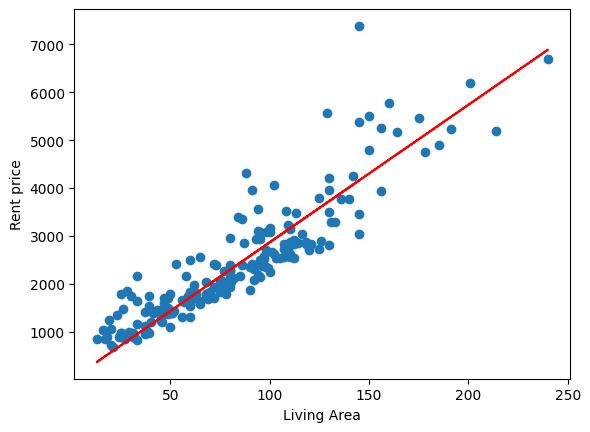

In [443]:
# Your code here
plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

y_regr = theta[0] + theta[1] * X[:,1]
plt.plot(X[:,1], y_regr, color='red', label='Regression line')

plt.show()

b) How many samples do you need to visit for reaching the convergence?

The biggest improvements are made before the first 300ish iterations but smaller improvements still occur after that. If we were very limited in cpu time, we would tell that the convergence vas reached around 300 samples

c) What kind of stopping criterion could we use here?

We would use the delta of the global cost function. When we compute the cost function, we can stop the iterations when the result is not improving more than a set delta.

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [444]:
# Your code here
y_pred = X @ theta
print(f"Theta = {theta}")
print(f"Cost = {cost_J(y_pred, y)}")

Theta = [ 0.338377   28.68612806]
Cost = 144162.5602768206


The result is really close to both of the other methods but the stochastic is way faster because we dont loop trough the whole dataset for each update. The stochastic might have a slightly worse final result because it is harder to find the exact perfect values but its speed and efficency compensates this.

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

The closed form solution is great to have to best value possible, but it is very compute hungry. The inverse of a really big matrix is not something simple to do. So, the gradient descent is better when compute time is limited.

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

Since for each iterations we update theta based on a random point, the outliers could significantly slow the congergence. If there is a lot of them, each update of the thetha values will not decrease the total cost value. This means that, if we are in a while loop searching to improve the cost value, it might either cause more loops to achieve the desired goal or cause the while loop to exit because the cost value is not getting smaller, but bigger.

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

A too small alpha value would make the descent too slow and remove the speed advantage of this method. An alpha too big would cause the theta values to jump from an extreme to another. This would be highly susceptible to outliers. To mitigate this, we could apply the same logic, but pick a small number of samples (mini-batch) rather than a single one for each operations. This would reduce the impact of outliers while keeping the algorithm faster than the full one.

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

If we have a dependency to the square and to the cube of the feature f1, we would augment the matrix to reflect this :  h(f) = theta0 + theta1xf1 + theta2xf1² + theta3xf1³. Yes, we need to take precautions because f1³ could mean huge numbers and cause overflows. The solutions would be to scale down each value to keep the relations between them but reduce their overall values

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

_Your answer here_

# Exercice 6 Optional – Mini-batch gradient descent for linear regression

Stochastic : 
Theta = [ 0.32518013 29.02018324]
Cost = 144715.36532107095


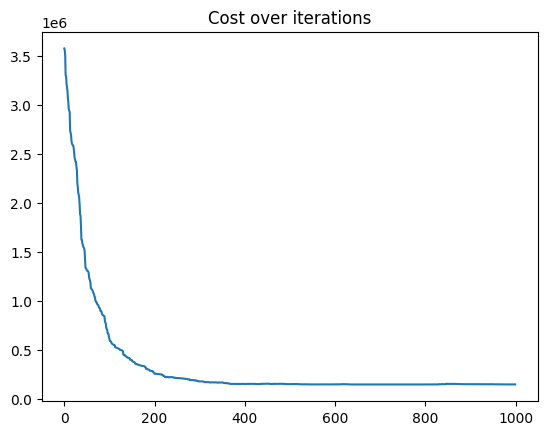

batch of 1 : 
Theta = [ 0.31051073 29.06744375]
Cost = 144869.2393588724


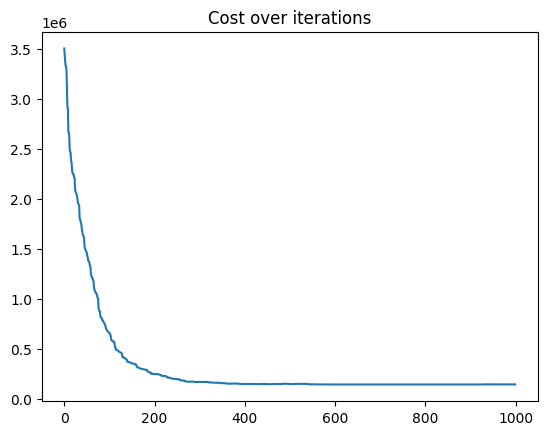

batch of 10 : 
Theta = [ 0.32754329 28.6711317 ]
Cost = 144160.22579802573


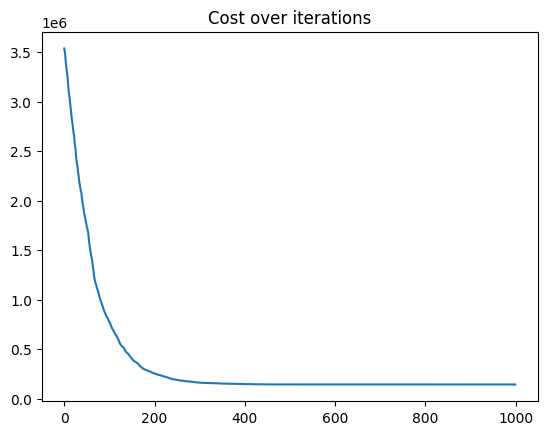

array([ 0.32754329, 28.6711317 ])

In [445]:
def batch_gradient_descent(X, y, batch_size, max_iter, alpha):
    theta = np.zeros((2))

    costs = []

    for i in range(0, max_iter): # we could also use a delta on the cost function with a while to stop when the cost is not improving but we wanted to see the curve after x iterations
        batch_idx = np.random.choice(y.shape[0], batch_size)
        y_stoch = y[batch_idx]
        y_pred_stoch = X[batch_idx, :] @ theta

        theta[0] = theta[0] - alpha * (1/len(y_stoch)) * np.sum(y_pred_stoch - y_stoch)
        theta[1] = theta[1] - alpha * (1/len(y_stoch)) * np.sum((y_pred_stoch - y_stoch) * X[batch_idx, 1])

        y_pred = X @ theta
        costs.append(cost_J(y_pred, y))


    y_pred = X @ theta
    print(f"Theta = {theta}")
    print(f"Cost = {cost_J(y_pred, y)}")

    plt.plot(range(0, len(costs)), costs)
    plt.title("Cost over iterations")
    plt.show()
    return theta


print("Stochastic : ")
stochastic_gradient_descent(X, y, max_iter = 1000, alpha=0.000001)
print("batch of 1 : ")
batch_gradient_descent(X, y, batch_size = 1, max_iter = 1000, alpha = 0.000001)
print("batch of 10 : ")
batch_gradient_descent(X, y, batch_size = 10, max_iter = 1000, alpha = 0.000001)

# Exercice 7 Optional – multi-variable linear regression

## A)

Theta = [2302.75644692 1057.56722311   65.54208244]
Cost = 133826.31478540495


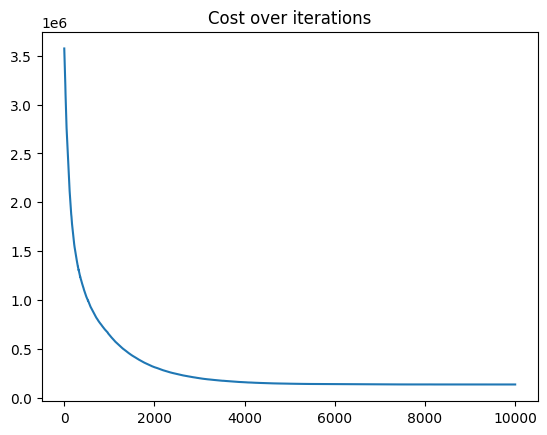

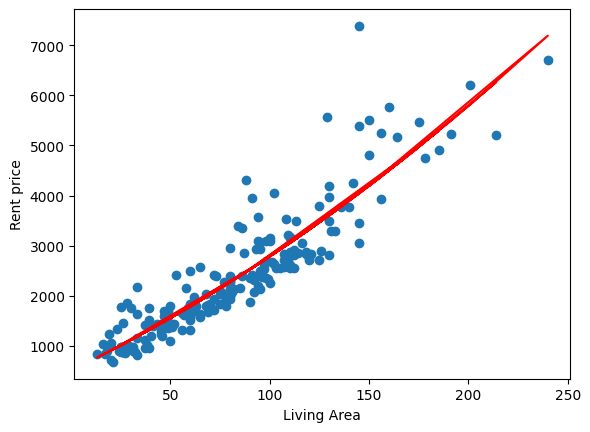

In [446]:
def multivariate_batch_gradient_descent(X, y, batch_size, max_iter, alpha):
    theta = np.zeros((X.shape[1]))

    costs = []

    for i in range(0, max_iter): # we could also use a delta on the cost function with a while to stop when the cost is not improving but we wanted to see the curve after x iterations
        batch_idx = np.random.choice(y.shape[0], batch_size)
        y_stoch = y[batch_idx]
        y_pred_stoch = X[batch_idx, :] @ theta

        for j in range(0, X.shape[1]):
            theta[j] = theta[j] - alpha * (1/len(y_stoch)) * np.sum((y_pred_stoch - y_stoch) * X[batch_idx, j])

        y_pred = X @ theta
        costs.append(cost_J(y_pred, y))


    y_pred = X @ theta
    print(f"Theta = {theta}")
    print(f"Cost = {cost_J(y_pred, y)}")

    plt.plot(range(0, len(costs)), costs)
    plt.title("Cost over iterations")
    plt.show()

    return theta






# need to normalize the data or else overflows will occur
living = dataset["living_area"].to_frame()
mean_living = living.mean()
std_living = living.std()
living_normalized = (living - mean_living) / std_living

X_norm = living_normalized
X_norm.insert(0, "x0", 1) # add the column full of ones at the start, this represents x0
X_norm.insert(2, "x2", X_norm.iloc[:,1]**2) # add the squared value of column 1 to column 2
X_norm = np.array(X_norm)

y = np.array(dataset["rent_price"])

theta = multivariate_batch_gradient_descent(X_norm, y, batch_size=10, max_iter = 10000, alpha=0.001)

plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

y_regr = theta[0] + theta[1] * X_norm[:,1] + theta[2] * X_norm[:,2]
plt.plot(dataset["living_area"], y_regr, color='red', label='Regression line')

plt.show()



The convergence is still happening. We observed that we could use a way bigger alpha to achieve the same results

## B)

Theta = [ 1.05482247  0.33405956 28.44182263]
Cost = 144284.47491785986


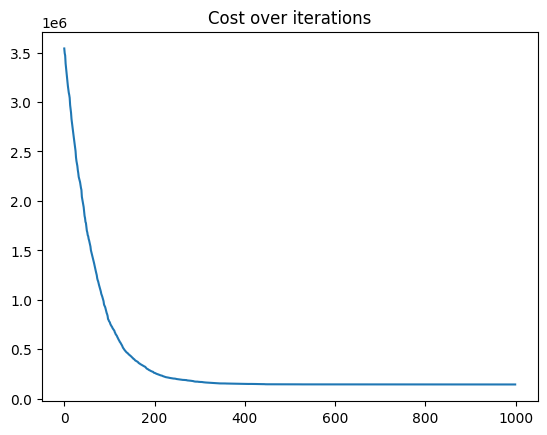

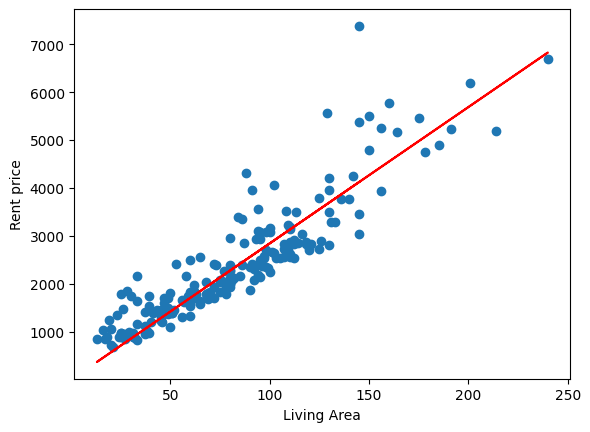

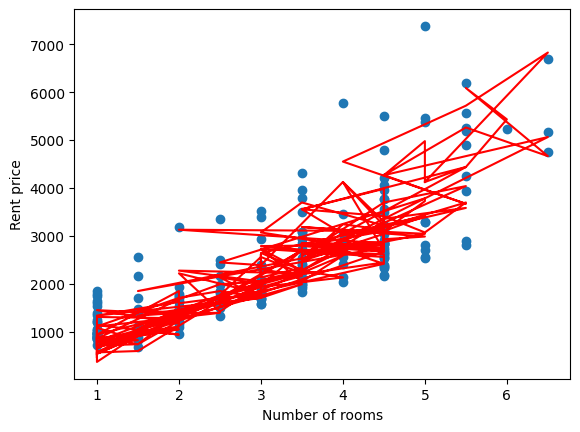

In [ ]:
X = dataset["living_area"].to_frame()
X.insert(0, "x0", 1) # add the column full of ones at the start, this represents x0
X.insert(0, "x2", dataset["nb_rooms"].to_frame()) # add the column full of ones at the start, this represents x0
X = np.array(X)

y = np.array(dataset["rent_price"])

theta = multivariate_batch_gradient_descent(X, y, batch_size=10, max_iter = 1000, alpha=0.000001)

plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

y_regr = theta[0] + theta[1] * X[:,1] + theta[2] * X[:,2]
plt.plot(dataset["living_area"], y_regr, color='red', label='Regression line')

plt.show()


The algorithm still manages to converge, but no clear improvements is seen here